<a href="https://colab.research.google.com/github/AmayFox/DataAnalysis/blob/main/yandex_pr_sb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сборный проект 1

<div class="alert alert-block alert-info">
    
<h2> Описание проекта </h2>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

</div>

# Описание данных
+ Name — название игры
+ Platform — платформа
+ Year_of_Release — год выпуска
+ Genre — жанр игры
+ NA_sales — продажи в Северной Америке (миллионы проданных копий)
+ EU_sales — продажи в Европе (миллионы проданных копий)
+ JP_sales — продажи в Японии (миллионы проданных копий)
+ Other_sales — продажи в других странах (миллионы проданных копий)
+ Critic_Score — оценка критиков (максимум 100)
+ User_Score — оценка пользователей (максимум 10)
+ Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
+ Данные за 2016 год могут быть неполными.

## План исследования

1. [Шаг 1. Изучение общей информации](#step1)


2. [Шаг 2. Предобработка данных](#step2)


3. [Шаг 3. Проведите исследовательский анализ данных](#step3)


4. [Шаг 4. Составьте портрет пользователя каждого региона](#step4)


5. [Шаг 5. Проверьте гипотезы](#step5)


6. [Шаг 6. Общий вывод](#step6)

# Шаг 1. Изучение общей информации <a id="step1"></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/datasets/games.csv')
df.head(7)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Изменим типы данных таким образом** <a id='types'></a>
+ Name ✅
+ Platform ✅
+ Year_of_Release ➡️  int64 (более удобно для сравнения)
+ Genre ✅
+ NA_sales ✅
+ EU_sales ✅
+ JP_sales ✅
+ Other_sales ✅
+ Critic_Score ➡️  int64 (пожалуй такая точность нам ни к чему + так удобнее категоризовать)
+ User_Score ➡️  int64 (пожалуй такая точность нам ни к чему + так удобнее категоризовать)
+ Rating ✅

In [ ]:
print(df.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


Пропуски в данных присутствуют

In [ ]:
df[df['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Крайне небольшое кол-во данных (по сравнению с общим объемом) имеют пустой год выпуска.

In [ ]:
df[pd.isna(df['Rating']) & pd.isna(df['User_Score']) & pd.isna(df['Critic_Score'])]['Name'].count()

6619

Пропуски в столбцах Rating User_Score и Critic_Score в большинстве случаев находятся в одних и тех же строках.

In [ ]:
df[(df['Critic_Score'] > 100) & (df['Critic_Score'] < 0)]['Name'].count()

0

In [ ]:
df['User_Score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
2.3       2
1.1       2
0.7       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

Нет отрицательных значений или значений больше максимального возможного (100 и 10 соответственно)

tbd = не определен, будем заполнять эти пропуски

In [ ]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Все в порядке

# Шаг 2. Предобработка данных <a id="step2"></a>

In [ ]:
df.columns = ['name','platform', 'year_of_release','genre','na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score','rating']
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Теперь все столбцы в нижнем регистре

In [ ]:
def func(row):
    if(row['user_score'] == 'tbd'):
        return -1;
    return row['user_score'];

In [ ]:
df['year_of_release'] = df['year_of_release'].fillna(-1).astype(int)
df['critic_score'] = df['critic_score'].fillna(-1).astype(int)
df['user_score'] = df['user_score'].fillna(-1)
df['user_score'] = df.apply(func, axis = 1)
df['user_score'] = pd.to_numeric(df['user_score']).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       16715 non-null int64
user_score         16715 non-null int64
rating             9949 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.4+ MB


Теперь все колонки имеют правильный тип данных. Тип данных меняли согласно [таблице](#types) составленной выше.

In [ ]:
df[df['year_of_release'] == -1]['name'].count() / df.shape[0]

0.01609332934489979

1.6% - доля игр с пропущенным годом выпуска. Думаю что таким процентом данных можно пожертвовать ради экономии времени.

Пропуск мог образоваться из-за малой известности игры или если она предварительно вышла на другой платформе в том же году и тот кто заполнял таблицу решил не дублировать год выпуска.

In [ ]:
df = df[df['year_of_release'] != -1]
df[df['year_of_release'] == -1]['name'].count()

0

Заполним пропуски в столбцах critic_score и user_score средними значениями по жанрам.

In [ ]:
df[df['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1,-1,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1,-1,NaN


Удалим 2 строки с пустым именем и жанром

In [ ]:
df = df[df['name'].isna() == False]
df['name'].isna().sum()

0

In [ ]:
df.reset_index(inplace=True, drop=True)

In [ ]:
df['rating'].isna().sum()

6676

In [ ]:
def func3(row):
    if (pd.isna(row['rating'])):
        a = df[(df['name'] == row['name']) & (df['rating'].isna() == False)]['rating'].tolist()
        if (len(a)):
            return a[0]
        else:
            return row['rating']
    else: 
        return row['rating']

In [ ]:
df['rating'] = df.apply(func3, axis = 1)

In [ ]:
df['rating'].isna().sum()

6259

Получилось устранить 417 пропусков в столбце rating. Действенных методов заполнения этих пропусков придумать не получается, так что придется просто заполнить пустые значения строкой unknown и продолжить исследование.

In [ ]:
df['rating'] = df['rating'].fillna('unknown')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       16444 non-null int64
user_score         16444 non-null int64
rating             16444 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.4+ MB


In [ ]:
df['sum_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1,unknown,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1,unknown,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1,unknown,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-1,-1,unknown,0.01


# Шаг 3. Проведите исследовательский анализ данных <a id='step3'></a>

+ Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

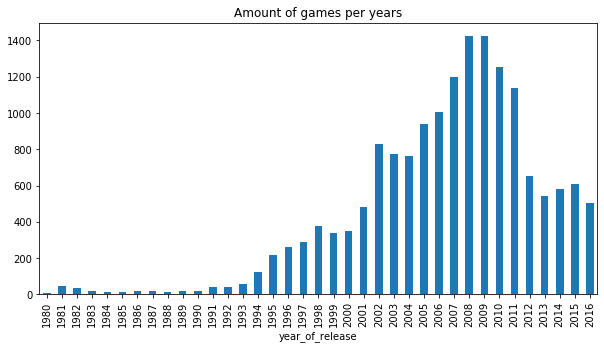

In [ ]:
axes = df.groupby('year_of_release')['name'].count().plot(kind = 'bar',title = 'Amount of games per years',figsize=(10,5))

В целом по графику видно что года до 2001 представляют мало инетреса для исследований. 

В целом можно использовать в исследовании только year_of_release > 2001

In [ ]:
df_r = df.query('year_of_release > 2001')

+ Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [ ]:
top_platforms = df.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).index[0:3]
top_platforms

Index(['PS2', 'X360', 'PS3'], dtype='object', name='platform')

In [ ]:
d1 = [[],[],[]]
df_r.reset_index(inplace=True, drop=True)
l = df_r.query('platform in @top_platforms').pivot_table(index = ['year_of_release', 'platform'], values='sum_sales',aggfunc='sum')

In [ ]:
for i in range(2002,2017):
    d1[0].append(0 if 'PS2' not in l['sum_sales'][i].index else l['sum_sales'][i]['PS2'])
    d1[1].append(0 if 'X360' not in l['sum_sales'][i].index else l['sum_sales'][i]['X360'])
    d1[2].append(0 if 'PS3' not in l['sum_sales'][i].index else l['sum_sales'][i]['PS3'])


In [ ]:
d = {'ps2': d1[0], 'x360': d1[1], 'ps3': d1[2]}
df_r1 = pd.DataFrame(data = d,index = range(2002,2017),columns = ['ps2', 'x360', 'ps3'])

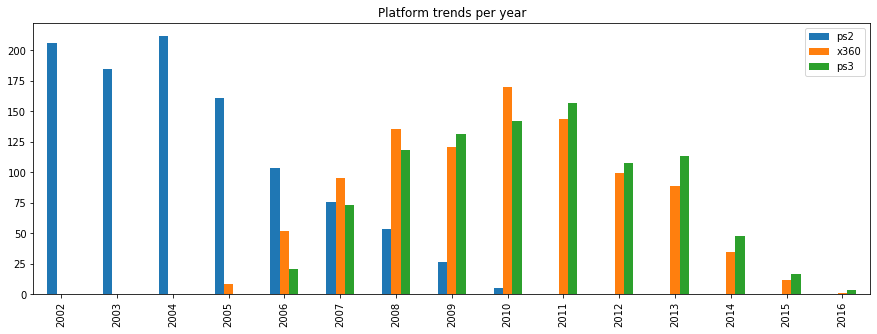

In [ ]:
axes = df_r1.plot(kind = 'bar',title = 'Platform trends per year',figsize=(15,5))

Характерный срок составляет 10-11 лет коммерческой успешой жизни платформы.

+ Возьмите данные за соответствующий актуальный период. 
+ Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
+ Не учитывайте в работе данные за предыдущие годы.

In [ ]:
df_r = df.query('year_of_release >= 2013')

Возьмем за актуальныей период, время с пояления xbox 360.

+ Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [ ]:
l = df_r.pivot_table(index = ['year_of_release', 'platform'], values='sum_sales',aggfunc='sum')
l['sum_sales'][2016]

platform
3DS     15.14
PC       5.25
PS3      3.60
PS4     69.25
PSV      4.25
Wii      0.18
WiiU     4.60
X360     1.52
XOne    26.15
Name: sum_sales, dtype: float64

Возьмем 3DS PS4 и XOne и PC как самые продающиеся для проверки потенциальной прибыльности

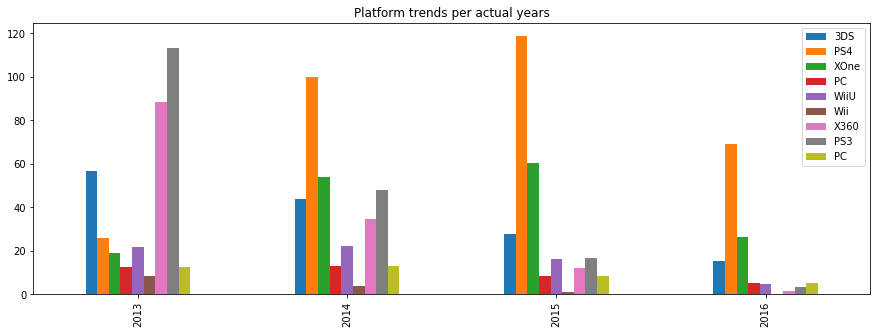

In [ ]:
test_platform = ['3DS','PS4','XOne','PC','WiiU','Wii','X360','PS3','PC']
d1 = [[] for i in range(len(test_platform))]
for i in range(2013,2017):
    for j in range(len(test_platform)):
        d1[j].append(0 if test_platform[j] not in l['sum_sales'][i].index else l['sum_sales'][i][test_platform[j]])
d = {test_platform[i] : d1[i] for i in range(len(test_platform))}
df_r1 = pd.DataFrame(data = d,index = range(2013,2017),columns = test_platform)
axes = df_r1.plot(kind = 'bar',title = 'Platform trends per actual years',figsize=(15,5))

Потенциально прибыльными являются PS4 и XOne и 3DS потому что их коммерческий жизненный срок еще не истек и они хорошо продавались в последние годы.

+ Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

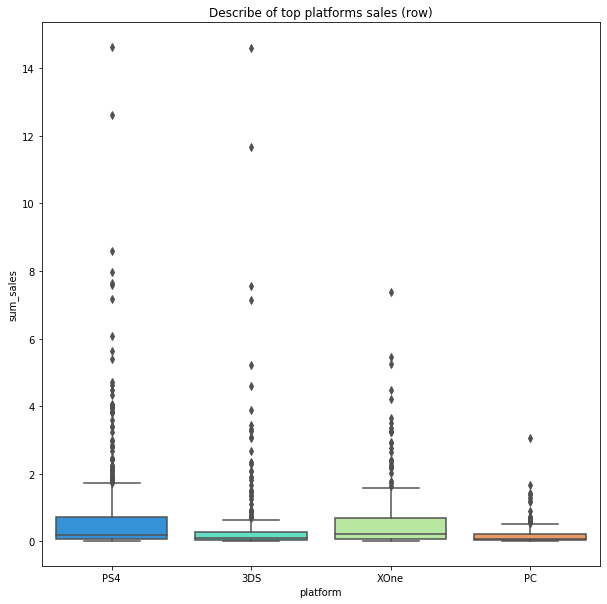

In [ ]:
selected_games = df_r.query('platform in ["PS4", "XOne","3DS","PC"]')
plt.figure(figsize=(10,10))
sns.boxplot(x = 'platform', y = 'sum_sales', palette = 'rainbow', data = selected_games)
plt.title('Describe of top platforms sales (row)')
plt.show()
plt.close()

Все платформы имеют большое кол-во выбросов. Данные не симметричны и смещены влево(в сторону меньших сумм).

Удалим выбросы чтобы сделать графики более показательными.

In [ ]:
for i in ["PS4", "XOne","3DS","PC"]:
    Q1 = selected_games[selected_games['platform'] == i]['sum_sales'].quantile(0.25)
    Q3 = selected_games[selected_games['platform'] == i]['sum_sales'].quantile(0.75)
    IQR = Q3 - Q1
    selected_games = selected_games[((selected_games['sum_sales'] > Q1 - 1.5 * IQR) & (selected_games['sum_sales'] < Q3 + 1.5 * IQR)) | (selected_games['platform'] != i)]
    

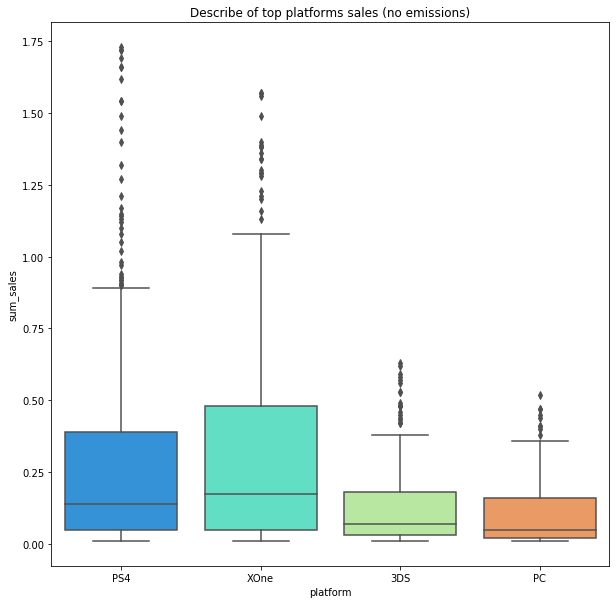

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x = 'platform', y = 'sum_sales', palette = 'rainbow', data = selected_games)
plt.title('Describe of top platforms sales (no emissions)')
plt.show()
plt.close()

Теперь видно что средние значения отличаются не слишком сильно, но лидирует XOne.

+ Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Для исследования возьмем платформу XOne.

Корреляция = -0.08248274844768902


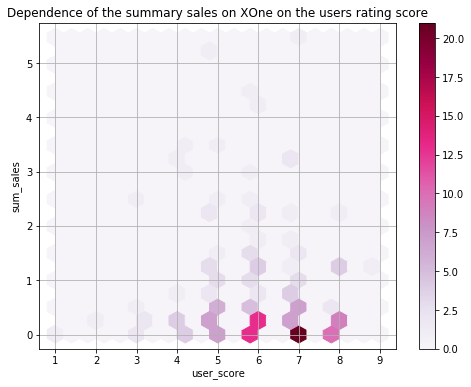

In [ ]:
df_r.query('platform == "XOne" and user_score != -1').plot(y='sum_sales', x='user_score', kind='hexbin', gridsize=20, 
          figsize=(8, 6), sharex=False, grid=True,cmap = 'PuRd', title="Dependence of the summary sales on XOne on the users rating score")
print("Корреляция =", df_r.query('platform == "XOne" and user_score != -1')['user_score'].corr(df_r.query('platform == "XOne" and user_score != -1')['sum_sales']))

Корелляция минимальная, еще и отрицательна. Параметры мало зависят друг от друга.

Корреляция = 0.4169983280084017


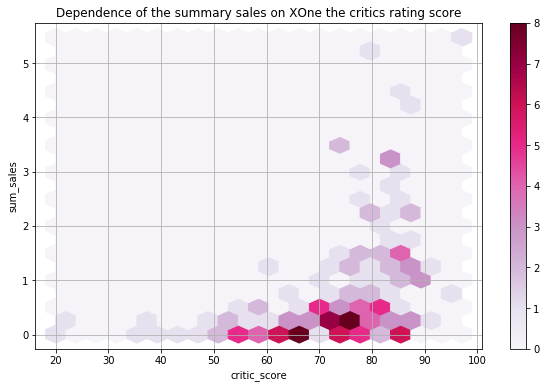

In [ ]:
df_r.query('platform == "XOne" and critic_score != -1').plot(y='sum_sales', x='critic_score', kind='hexbin', gridsize=20, 
          figsize=(10, 6), sharex=False, grid=True,cmap = 'PuRd', title="Dependence of the summary sales on XOne the critics rating score")
print("Корреляция =", df_r.query('platform == "XOne" and critic_score != -1')['critic_score'].corr(df_r.query('platform == "XOne" and critic_score != -1')['sum_sales']))

Корелляция выше и явно видно что слово критиков имеет вес.

+ Соотнесите выводы с продажами игр на других платформах.

Возьмем PS4 для примера

Корреляция = -0.027033058622341188


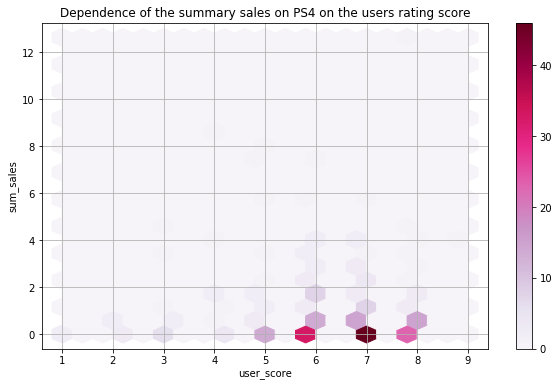

In [ ]:
df_r.query('platform == "PS4" and user_score != -1').plot(y='sum_sales', x='user_score', kind='hexbin', gridsize=20, 
          figsize=(10, 6), sharex=False, grid=True,cmap = 'PuRd', title="Dependence of the summary sales on PS4 on the users rating score")
print("Корреляция =", df_r.query('platform == "PS4" and user_score != -1')['user_score'].corr(df_r.query('platform == "PS4" and user_score != -1')['sum_sales']))

Корреляция = 0.40656790206178095


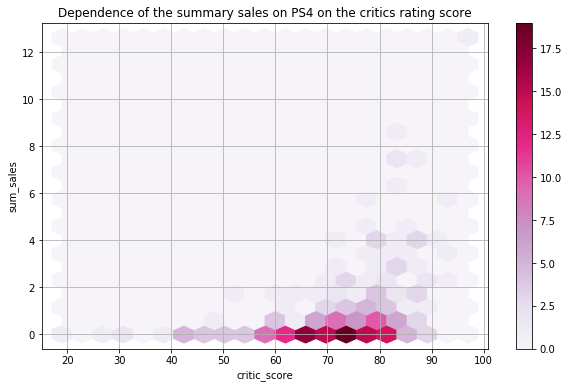

In [ ]:
df_r.query('platform == "PS4" and critic_score != -1').plot(y='sum_sales', x='critic_score', kind='hexbin', gridsize=20, 
          figsize=(10, 6), sharex=False, grid=True,cmap = 'PuRd', title="Dependence of the summary sales on PS4 on the critics rating score")
print("Корреляция =", df_r.query('platform == "PS4" and critic_score != -1')['critic_score'].corr(df_r.query('platform == "PS4" and critic_score != -1')['sum_sales']))

Тендеции описанные в случае XOne сохраняются и на других платформах.

+ Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

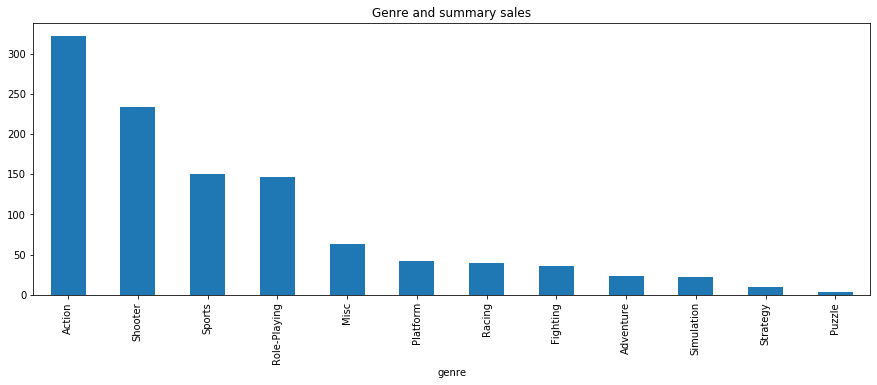

In [ ]:
df_r.groupby('genre')['sum_sales'].sum().sort_values(ascending=False).plot(kind = 'bar',title = 'Genre and summary sales',figsize=(15,5))


Можно сказать что более активные и динамичные жанры имеют большие продажи, и наоборот, жанры с неторопящимся геемплеем и необходимость много и долго думать имеют более низкие продажи.

# Шаг 4. Составьте портрет пользователя каждого региона <a id='step4'></a>

Определите для пользователя каждого региона (NA, EU, JP):
+ Самые популярные платформы (топ-5). Опишите различия в долях продаж.
+ Самые популярные жанры (топ-5). Поясните разницу.
+ Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [ ]:
df_r.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]

platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

In [ ]:
df_r.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

In [ ]:
df_r.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]

platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

У северной америки и европы рейтинги топ 5 самых популярных платформ выглядят очень похожими.
Единственные различия в том что в na преобладает приставка созданная там (X360 - Microsoft) а в европе в примерно равной степени представленны приставки из разных стран.

Тогда как в японии топ популярных платформ сильно отличается. Тут преобладают приставки произведенные в японии и тут они сильно подавляют американские аналоги. 

Так же нельзя не отметить любовь японцев к портативным приставкам, в топе их большинство (3/5 приставок)

In [ ]:
df_r.groupby('genre')['na_sales'].sum().sort_values(ascending=False)[:5]

genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

In [ ]:
df_r.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)[:5]

genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

In [ ]:
df_r.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)[:5]

genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64

Тенденция сохраняется - вкусы америки и европы в целом очень схожи, отличаются лишь в 1 позиции. 

Общая тенденция - людям больше нравятся динамичные игры из жанров Action Sports Shooter и подобное.

В целом и япония следует этому за исключением рп игр. В японии они очень расспространены, потому что игры именно этого жанра стали первыми в японии. Даже существует отдельный жанр игр JRPG (Japan RPG) присущий играм по ролям именно из японии.

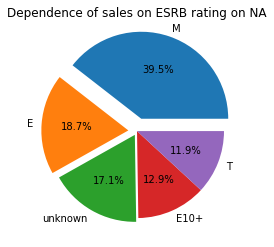

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Dependence of sales on ESRB rating on NA")
axis = ax.pie(df_r.groupby('rating')['na_sales'].sum().sort_values(ascending=False)[:5], 
              labels=df_r.groupby('rating')['na_sales'].sum().sort_values(ascending=False).index[:5],
             autopct='%1.1f%%',
             explode=(0.15, 0.1, 0.05, 0,0),
             )

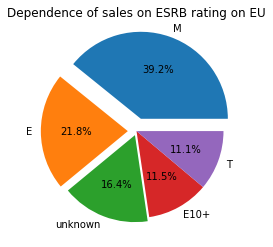

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Dependence of sales on ESRB rating on EU")
axis = ax.pie(df_r.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)[:5], 
              labels=df_r.groupby('rating')['na_sales'].sum().sort_values(ascending=False).index[:5],
             autopct='%1.1f%%',
             explode=(0.15, 0.1, 0.05, 0,0),
             )

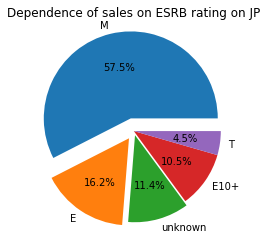

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Dependence of sales on ESRB rating on JP")
axis = ax.pie(df_r.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)[:5], 
              labels=df_r.groupby('rating')['na_sales'].sum().sort_values(ascending=False).index[:5],
             autopct='%1.1f%%',
             explode=(0.15, 0.1, 0.05, 0,0),
             )

Общая тенденция - люди чаще покупаю игры рейтинга М (взрослые) что логично, потом идут E (everyone), потом T (подростки) и в целом в этом есть логика.

Все страны вписываются в эту тенденцию. Единственное различие что в японии игры группы M покупают значительно чаще чем в других странах. но в общем и целом это не выбивается из концепции.

# Шаг 5. Проверьте гипотезы <a id='step5'></a>

+ Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Формируем нулевую гипотезу H₀ (по принципу равенства):
+ средние пользовательские рейтинги платформ Xbox One и PC равны


Формируем альтернативую гипотезу H₁ (берем альтернативу от нулевой гипотезы):
+ средние пользовательские рейтинги платформ Xbox One и PC различаются


и проверим их

In [ ]:
xone = df_r.query('platform == "XOne"')['user_score']
pc = df_r.query('platform == "PC"')['user_score']
len(xone),len(pc)

(247, 189)

Возьмем альфа равное 5%

In [ ]:
res = st.ttest_ind(xone,pc, equal_var=False)
alpha = .05
print('p-значение:', res.pvalue)

if (res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.27307115058550335
Не получилось отвергнуть нулевую гипотезу


Гипотезу о равенстве среднего пользовательского рейтинга для XOne и PC не получилось отвергнуть. Утверждение о том что средние рейтинги для этих платформ различаются, ошибочно в 27% случаем.

+ Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Формируем нулевую гипотезу H₀ (по принципу равенства):
+ средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») равны


Формируем альтернативую гипотезу H₁ (берем альтернативу от нулевой гипотезы):
+ средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») отличаются

In [ ]:
action = df_r.query('genre == "Action"')['user_score']
sports = df_r.query('genre == "Sports"')['user_score']
alpha = .05

res = st.ttest_ind( action, sports, equal_var=False)

print('p-значение: {:0.20f}'.format(res.pvalue))

if (res.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.01316245074888930562
Отвергаем нулевую гипотезу


In [ ]:
df_res = df_r.query('genre == "Action" or genre == "Sports"')
df_res.pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
Action,2.740209
Sports,3.350467


Можно утверждать с уверенностью 99,7% , что средние пользовательские рейтинги для жанров Action и Sports различаются. При выборе между игрой этих двух жанров, лучше отдать предпочтение жанру Sports.

# Шаг 6. Общий вывод <a id='step6'></a>

Исследование показало что есть ряд наилучших характеристик для игры:

+ Лучшие платфрмы для Америки и Европы - PS3, Xbo360, PS4, для Японии - 3DS и PS3


+ Лучшие жанры: Action,Sports для Америки и Европы, Role-Playing — для Японии.
    
    
+ Лучший возрастной рейтинг ESRB для Америки, Европы и Японии - M и E.


+ Оценки пользователей на продажи практически не влияют. Отзывы критиков влияют больше, на них стоит обращать внимание.